In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [ ]:

data = pd.read_csv(r'/content/drive/MyDrive/data science/student_scores.csv')
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [ ]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
data.isnull().sum()

,0
Hours,0
Scores,0


In [ ]:
data.dtypes

,0
Hours,float64
Scores,int64


In [ ]:
data.size

50

In [157]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [158]:
ohe=OneHotEncoder()
imputer=SimpleImputer()

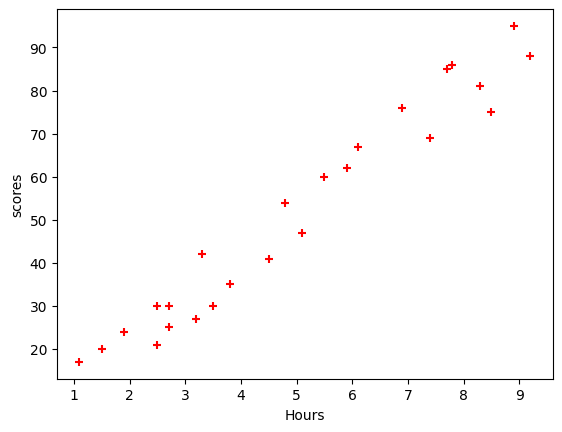

In [ ]:
plt.xlabel('Hours')
plt.ylabel('scores')
plt.scatter(data['Hours'],data['Scores'],color='red',marker='+')

In [ ]:
x=data.drop('Scores',axis=1)
x

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [ ]:
y=data[['Scores']]
y

,Scores
0,21
1,47
2,27
3,75
4,30
5,20
6,88
7,60
8,81
9,25


In [ ]:
model=linear_model.LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.score(x,y)

0.9529481969048356

In [ ]:

model.predict([[7.9],[8],[8.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[79.71252019],
       [80.69010053],
       [85.57800223]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=10)

In [ ]:
model=linear_model.LinearRegression()

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.score(x,y)

0.9529481969048356

In [ ]:
pred_y=model.predict(x_test)

In [ ]:
pred_y

array([[17.14737849],
       [52.3402707 ],
       [34.74382459],
       [33.76624426],
       [46.47478866],
       [74.8246185 ],
       [13.23705714],
       [56.25059205],
       [60.16091341],
       [39.63172629]])

In [ ]:
print(y_test)

    Scores
5       20
1       47
13      42
2       27
12      41
19      69
14      17
7       60
11      62
22      35


In [ ]:
print(x_test)

    Hours
5     1.5
1     5.1
13    3.3
2     3.2
12    4.5
19    7.4
14    1.1
7     5.5
11    5.9
22    3.8


In [ ]:
print(y_test,pred_y)

    Scores
5       20
1       47
13      42
2       27
12      41
19      69
14      17
7       60
11      62
22      35 [[17.14737849]
 [52.3402707 ]
 [34.74382459]
 [33.76624426]
 [46.47478866]
 [74.8246185 ]
 [13.23705714]
 [56.25059205]
 [60.16091341]
 [39.63172629]]


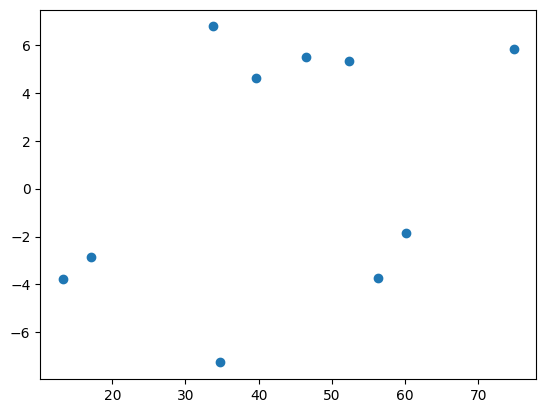

In [ ]:
plt.scatter(pred_y,pred_y-y_test)

In [173]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

In [160]:
ohe=OneHotEncoder()
imputer=SimpleImputer()

In [162]:
data = {'name': ['elana','asha','george','mathew','mereena','uma','elss','meenu','paru','raju'],
        'age': [24,20,21,22,25,26,17,29,15,28],
        'score': [34,45,48,31,36,37,27,50,29,42]}
df = pd.DataFrame(data)
df

,name,age,score
0,elana,24,34
1,asha,20,45
2,george,21,48
3,mathew,22,31
4,mereena,25,36
5,uma,26,37
6,elss,17,27
7,meenu,29,50
8,paru,15,29
9,raju,28,42


In [176]:
df_encoded = pd.get_dummies(df, columns=['name'], drop_first=True)

In [166]:
df.head()

,name,age,score
0,elana,24,34
1,asha,20,45
2,george,21,48
3,mathew,22,31
4,mereena,25,36


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    10 non-null     object
 1   age     10 non-null     int64 
 2   score   10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [ ]:
df.describe()

,age,score
count,10.000000,10.000000
mean,22.700000,37.900000
std,4.571652,8.033956
min,15.000000,27.000000
25%,20.250000,31.750000
50%,23.000000,36.500000
75%,25.750000,44.250000
max,29.000000,50.000000


In [ ]:
df.isnull().sum()

,0
name,0
age,0
score,0


In [ ]:
df.shape

(10, 3)

In [ ]:
df.size

30

In [ ]:
df.dtypes

,0
name,object
age,int64
score,int64


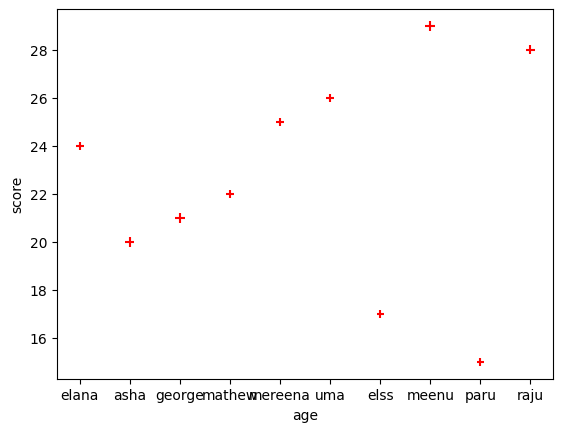

In [ ]:
plt.xlabel('name')
plt.xlabel('age')
plt.ylabel('score')
plt.scatter(df['name'],df['age'],df['score'],color='red',marker='+')

In [168]:
X = df[['name', 'age']]
X

,name,age
0,elana,24
1,asha,20
2,george,21
3,mathew,22
4,mereena,25
5,uma,26
6,elss,17
7,meenu,29
8,paru,15
9,raju,28


In [ ]:
Y = df['score']
Y

,score
0,34
1,45
2,48
3,31
4,36
5,37
6,27
7,50
8,29
9,42


In [177]:
X = df_encoded.drop('score', axis=1)
Y = df_encoded['score']

In [178]:
print(X)

   age  name_encoded  name_elana  name_elss  name_george  name_mathew  \
0   24             1        True      False        False        False   
1   20             0       False      False        False        False   
2   21             3       False      False         True        False   
3   22             4       False      False        False         True   
4   25             6       False      False        False        False   
5   26             9       False      False        False        False   
6   17             2       False       True        False        False   
7   29             5       False      False        False        False   
8   15             7       False      False        False        False   
9   28             8       False      False        False        False   

   name_meenu  name_mereena  name_paru  name_raju  name_uma  
0       False         False      False      False     False  
1       False         False      False      False     False  
2       Fa

In [179]:
print(Y)

     Survived
0           0
1           1
2           1
3           1
4           0
..        ...
886         0
887         1
888         0
889         1
890         0

[891 rows x 1 columns]


In [182]:
model = LinearRegression()
model.fit(X, Y)

ValueError: Found input variables with inconsistent numbers of samples: [10, 891]

In [180]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=30)

ValueError: Found input variables with inconsistent numbers of samples: [10, 891]

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, Y_train)

ValueError: could not convert string to float: 'elss'

In [ ]:
model.score(X_train,Y_train)

ValueError: could not convert string to float: 'meenu'

In [ ]:
Y_pred = model.predict(X_test)

ValueError: could not convert string to float: 'paru'

In [ ]:
#2nd question

In [ ]:
data=pd.read_csv(r'/content/drive/MyDrive/data science/titanic.csv')
data

,Unnamed: 0,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.0000,NaN,S,0
887,887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.0000,B42,S,1
888,888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
data.head()

,Unnamed: 0,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [ ]:
data.describe()

,Unnamed: 0,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,667.500000,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
PassengerId,0
Name,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data['Age'] = data['Age'].fillna(0)

In [ ]:
data['Cabin']=data['Cabin'].fillna(0)

In [ ]:
print(data)

     Unnamed: 0  PassengerId  \
0             0            1   
1             1            2   
2             2            3   
3             3            4   
4             4            5   
..          ...          ...   
886         886          887   
887         887          888   
888         888          889   
889         889          890   
890         890          891   

                                                  Name  Pclass     Sex   Age  \
0                              Braund, Mr. Owen Harris       3    male  22.0   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...       1  female  38.0   
2                               Heikkinen, Miss. Laina       3  female  26.0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)       1  female  35.0   
4                             Allen, Mr. William Henry       3    male  35.0   
..                                                 ...     ...     ...   ...   
886                              Montvila, Rev. Juozas 

In [ ]:
data.size

11583

In [ ]:
data.shape

(891, 13)

In [ ]:
data.dtypes

,0
Unnamed: 0,int64
PassengerId,int64
Name,object
Pclass,int64
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
X=data[['PassengerId','Pclass','Age','SibSp','Parch','Fare']]
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,0.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [ ]:
Y=data[['Survived']]
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=100)

In [ ]:
model=linear_model.LinearRegression()

In [ ]:
model.fit(X,Y)

LinearRegression()

In [ ]:
model.score(X,Y)

0.1450411786119965

In [ ]:
pred_y=model.predict(x_test)
pred_y

array([[0.37641511],
       [0.25714817],
       [0.20245128],
       [0.32707104],
       [0.35822996],
       [0.883135  ],
       [0.27967395],
       [0.50188462],
       [0.68613396],
       [0.27924931],
       [0.86751635],
       [0.23639643],
       [0.35750171],
       [0.14284196],
       [0.25314503],
       [0.2285883 ],
       [0.61274541],
       [0.58497605],
       [0.52297329],
       [0.23814029],
       [0.3082912 ],
       [0.68059138],
       [0.24632481],
       [0.23452471],
       [0.22022094],
       [0.31142535],
       [0.41407262],
       [0.42254816],
       [0.18707453],
       [0.25291637],
       [0.18306561],
       [0.3890336 ],
       [0.61729824],
       [0.40386844],
       [0.632176  ],
       [0.17071616],
       [0.61548098],
       [0.77216484],
       [0.43381323],
       [0.32470374],
       [0.20077508],
       [0.79315009],
       [0.33932206],
       [0.3903409 ],
       [0.18446941],
       [0.32719552],
       [0.24553222],
       [0.682